In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors
import random
import numpy as np
colors = sns.color_palette('colorblind', n_colors=10)

In [2]:
BR = 25

In [3]:
all_results = {}
all_results_max = {}
all_results_labels = {}
all_results_perfect = {}
all_results_perfect_max = {}

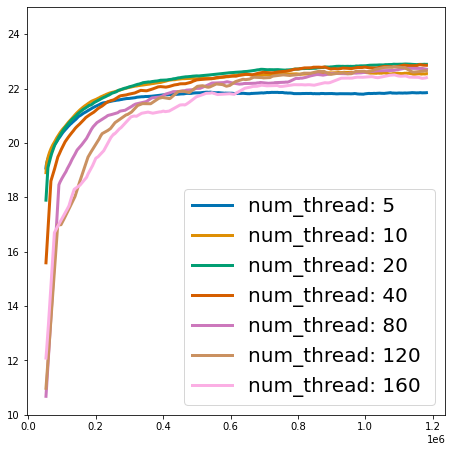

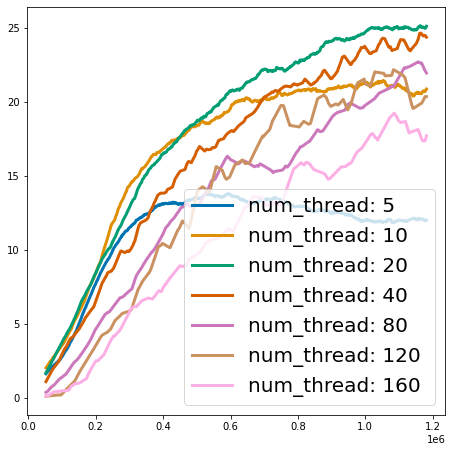

In [4]:
df = pd.read_csv("data/hyperparameters/OBL_IQL_threads_scores.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
adapt_regret = {}
adapt_regret_max = {}
i = 0
for c in df.columns:
    if c.endswith('score'):
        new_columns.append(c)
        adapt_regret[c] = np.mean(BR - df[c].loc[:3000])
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1
    if c.endswith('score__MAX'):
        new_columns_max.append(c)
        adapt_regret_max[c] = np.mean(BR - df[c])

plt.legend(fontsize=20)
plt.ylim([10,25])
# plt.show()
plt.savefig('OBL_IQL_threads_scores_curves.pdf', bbox_inches='tight')

df = pd.read_csv("data/hyperparameters/OBL_IQL_threads_perfect.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
perfect = {}
perfect_max = {}
i = 0
for c in df.columns:
    if c.endswith('perfect'):
        new_columns.append(c)
        perfect[c] = df[c].loc[1500]
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1

plt.legend(fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.show()
plt.savefig('OBL_IQL_threads_perfect.pdf', bbox_inches='tight')

all_results['Number of threads'] = adapt_regret
all_results_max['Number of threads'] = adapt_regret_max
all_results_labels['Number of threads'] = [5, 10, 20, 40, 80, 120, 160]

all_results_perfect['Number of threads'] = perfect
all_results_perfect_max['Number of threads'] = perfect_max

,num_samples,replay_buffer_size: 20000 (Replay size: partner IQL) - _step,replay_buffer_size: 20000 (Replay size: partner IQL) - _step__MIN,replay_buffer_size: 20000 (Replay size: partner IQL) - _step__MAX,replay_buffer_size: 20000 (Replay size: partner IQL) - score,replay_buffer_size: 20000 (Replay size: partner IQL) - score__MIN,replay_buffer_size: 20000 (Replay size: partner IQL) - score__MAX,replay_buffer_size: 50000 (Replay size: partner IQL) - _step,replay_buffer_size: 50000 (Replay size: partner IQL) - _step__MIN,replay_buffer_size: 50000 (Replay size: partner IQL) - _step__MAX,...,replay_buffer_size: 150000 (Replay size: partner IQL) - _step__MAX,replay_buffer_size: 150000 (Replay size: partner IQL) - score,replay_buffer_size: 150000 (Replay size: partner IQL) - score__MIN,replay_buffer_size: 150000 (Replay size: partner IQL) - score__MAX,replay_buffer_size: 200000 (Replay size: partner IQL) - _step,replay_buffer_size: 200000 (Replay size: partner IQL) - _step__MIN,replay_buffer_size: 200000 (Replay size: partner IQL) - _step__MAX,replay_buffer_size: 200000 (Replay size: partner IQL) - score,replay_buffer_size: 200000 (Replay size: partner IQL) - score__MIN,replay_buffer_size: 200000 (Replay size: partner IQL) - score__MAX
0,0,0.0,0.0,0.0,3.623,3.623,3.623,0.0,0.0,0.0,...,0.0,3.623,3.623,3.623,0.0,0.0,0.0,3.623,3.623,3.623
1,19110,0.0,0.0,0.0,3.623,3.623,3.623,1.0,1.0,1.0,...,0.0,3.623,3.623,3.623,0.0,0.0,0.0,3.623,3.623,3.623
2,20015,0.0,0.0,0.0,3.623,3.623,3.623,1.0,1.0,1.0,...,0.0,3.623,3.623,3.623,1.0,1.0,1.0,16.542,16.542,16.542
3,20098,1.0,1.0,1.0,16.817,16.817,16.817,1.0,1.0,1.0,...,0.0,3.623,3.623,3.623,1.0,1.0,1.0,16.542,16.542,16.542
4,20166,1.0,1.0,1.0,16.645,16.645,16.645,1.0,1.0,1.0,...,0.0,3.623,3.623,3.623,1.0,1.0,1.0,16.542,16.542,16.542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,10374095,819.0,819.0,819.0,22.806,22.806,22.806,700.0,700.0,700.0,...,667.0,23.390,23.390,23.390,38.0,38.0,38.0,22.375,22.375,22.375
13950,10389304,819.0,819.0,819.0,22.806,22.806,22.806,700.0,700.0,700.0,...,667.0,23.390,23.390,23.390,38.0,38.0,38.0,22.375,22.375,22.375
13951,10404163,819.0,819.0,819.0,22.806,22.806,22.806,700.0,700.0,700.0,...,667.0,23.390,23.390,23.390,38.0,38.0,38.0,22.375,22.375,22.375
13952,10418802,819.0,819.0,819.0,22.806,22.806,22.806,700.0,700.0,700.0,...,667.0,23.390,23.390,23.390,38.0,38.0,38.0,22.375,22.375,22.375


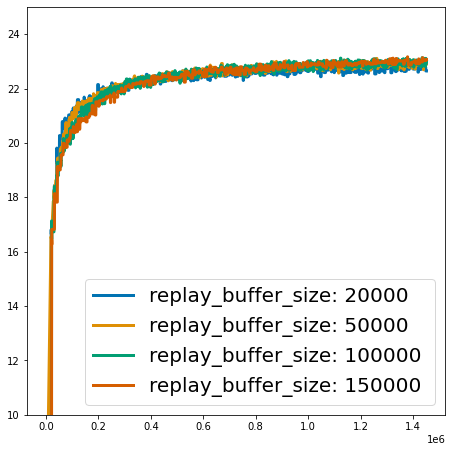

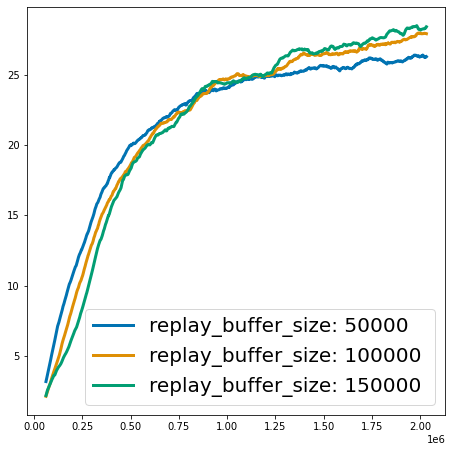

In [6]:
df = pd.read_csv("data/hyperparameters/OBL_IQL_Replay_scores.csv")

df.fillna(method='ffill', inplace=True)
# df = df.rolling(window=200).mean()
display(df)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
replay_adapt_regret = {}
replay_adapt_regret_max = {}
i = 0
for c in df.columns:
    if c.endswith('score') and not c.startswith('replay_buffer_size: 200000'):
        new_columns.append(c)
        replay_adapt_regret[c] = np.mean(BR - df[c].loc[:3000])
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1
    if c.endswith('score__MAX'):
        new_columns_max.append(c)
        replay_adapt_regret_max[c] = np.mean(BR - df[c])

plt.legend(fontsize=20)
plt.ylim([10,25])
# plt.show()
plt.savefig('OBL_IQL_Replay_scores_curves.pdf', bbox_inches='tight')


df = pd.read_csv("data/hyperparameters/OBL_IQL_Replay_perfect.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
perfect = {}
perfect_max = {}
i = 0
for c in df.columns:
    if c.endswith('perfect') and not c.startswith('replay_buffer_size: 200000'):
        new_columns.append(c)
        perfect[c] = df[c].loc[1500]
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1

plt.legend(fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.show()
plt.savefig('OBL_IQL_Replay_perfect_curves.pdf', bbox_inches='tight')

        
all_results['Replay buffer size'] = replay_adapt_regret
all_results_max['Replay buffer size'] = replay_adapt_regret_max
all_results_labels['Replay buffer size'] = [2e4, 5e4, 1e5, 1.5e5]

all_results_perfect['Replay buffer size'] = perfect
all_results_perfect_max['Replay buffer size'] = perfect_max

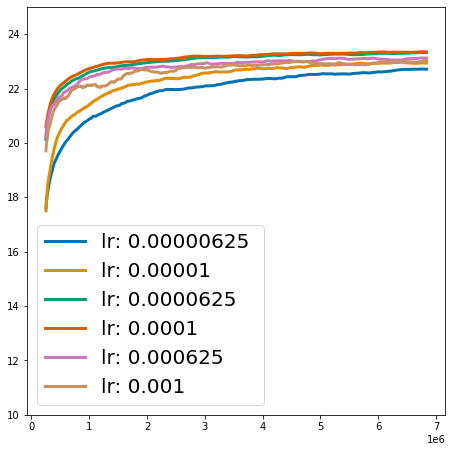

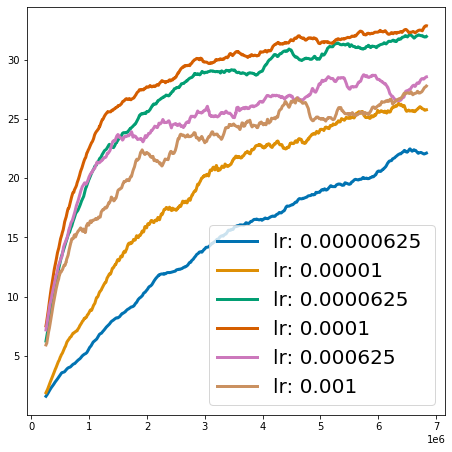

In [7]:
df = pd.read_csv("data/hyperparameters/OBL_IQL_lr_scores.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
adapt_regret = {}
adapt_regret_max = {}
i = 0
for c in df.columns:
    if c.endswith('score'):
        new_columns.append(c)
        adapt_regret[c] = np.mean(BR - df[c].loc[:3000])
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1
    if c.endswith('score__MAX'):
        new_columns_max.append(c)
        adapt_regret_max[c] = np.mean(BR - df[c])

plt.legend(fontsize=20)
plt.ylim([10,25])
# plt.show()
plt.savefig('OBL_IQL_lr_scores_curves.pdf', bbox_inches='tight')


df = pd.read_csv("data/hyperparameters/OBL_IQL_lr_perfect.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
perfect = {}
perfect_max = {}
i = 0
for c in df.columns:
    if c.endswith('perfect'):
        new_columns.append(c)
        perfect[c] = df[c].loc[1500]
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1

plt.legend(fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.show()
plt.savefig('OBL_IQL_lr_perfect_curves.pdf', bbox_inches='tight')

all_results['Fine-tuning learning rate'] = adapt_regret
all_results_max['Fine-tuning learning rate'] = adapt_regret_max
all_results_labels['Fine-tuning learning rate'] = [6.25e-6, 1e-5, 6.25e-5, 1e-4, 6.25e-4, 1e-3]

all_results_perfect['Fine-tuning learning rate'] = perfect
all_results_perfect_max['Fine-tuning learning rate'] = perfect_max

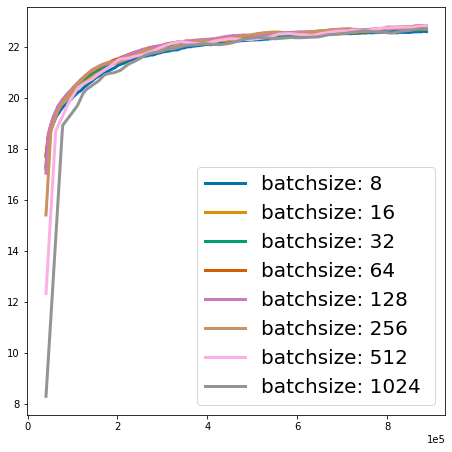

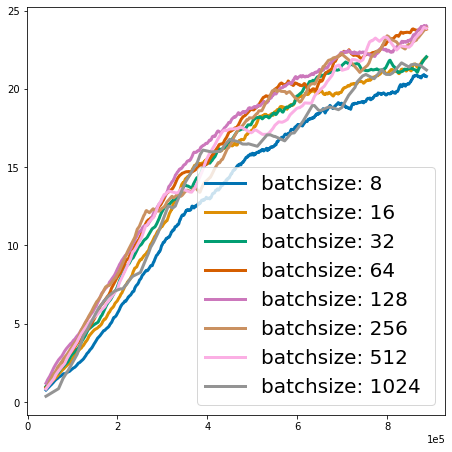

In [8]:
df = pd.read_csv("data/hyperparameters/OBL_IQL_BS_scores.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()
# display(df)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
adapt_regret = {}
adapt_regret_max = {}
i = 0
for c in df.columns:
    if c.endswith('score'):
        new_columns.append(c)
        adapt_regret[c] = np.mean(BR - df[c].loc[:3000])
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1
    if c.endswith('score__MAX'):
        new_columns_max.append(c)
        adapt_regret_max[c] = np.mean(BR - df[c])

plt.legend(fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.show()
plt.savefig('OBL_IQL_BS_scores_curves.pdf', bbox_inches='tight')



df = pd.read_csv("data/hyperparameters/OBL_IQL_BS_perfect.csv")
df.fillna(method='ffill', inplace=True)
df = df.rolling(window=200).mean()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))

new_columns, new_columns_max = [], []
perfect = {}
perfect_max = {}
i=0
for c in df.columns:
    if c.endswith('perfect'):
        new_columns.append(c)
        perfect[c] = df[c].loc[3000]
        plt.plot(df["num_samples"].loc[:3000], df[c].loc[:3000], label=c.split("(")[0], color=colors[i], lw=3)
        i += 1

plt.legend(fontsize=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.show()
plt.savefig('OBL_IQL_BS_perfect_curves.pdf', bbox_inches='tight')


all_results['Batch size'] = adapt_regret
all_results_max['Batch size'] = adapt_regret_max
all_results_labels['Batch size'] = [8, 16, 32, 64, 128, 256, 512, 1024]

all_results_perfect['Batch size'] = perfect
all_results_perfect_max['Batch size'] = perfect_max

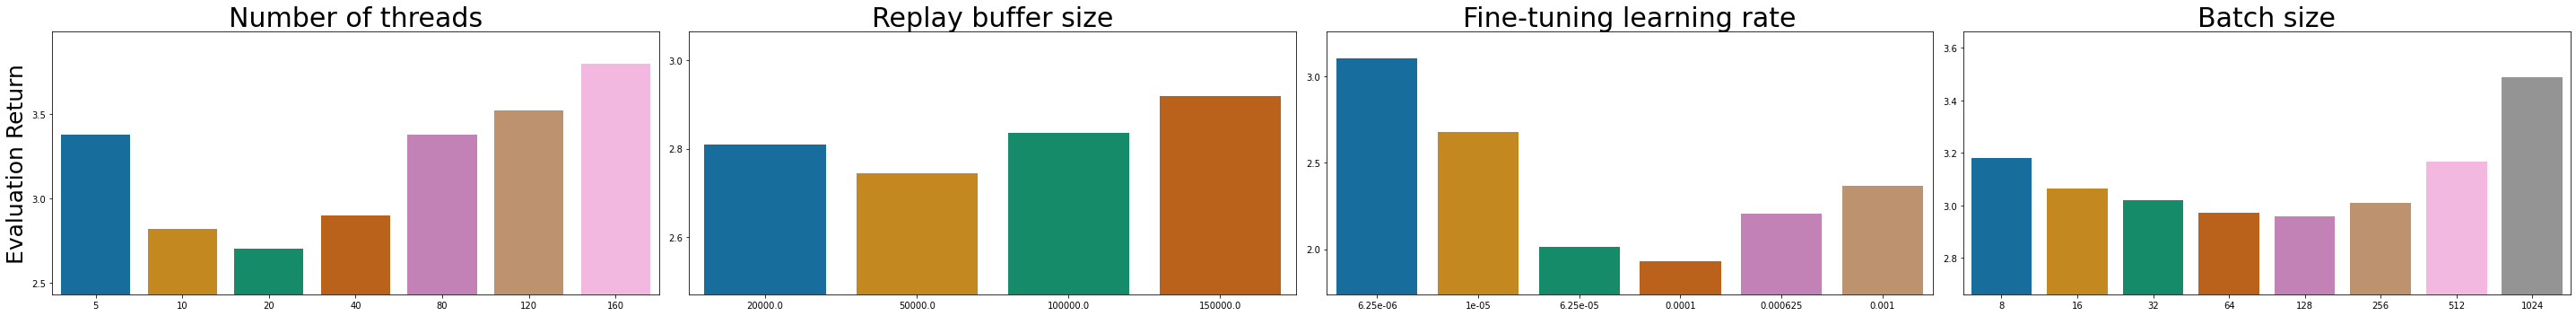

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

fig, axes = plt.subplots(nrows=1, ncols=len(all_results.keys()), figsize=(40, 5))

for i, (ax, hp, values, values_max) in enumerate(zip(axes.flat, all_results.keys(), all_results.values(), all_results_max.values())):
    colors = sns.color_palette('colorblind', n_colors=len(values.keys()))

    sns.barplot(x=list(np.arange(len(values.keys()))), y=list(values.values()), ax=ax, palette=colors)
    x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.set_ylim(min(list(values.values()))*0.9, max(list(values.values()))*1.05)

#     print(np.array(list(values_max.values())) - np.array(list(values.values())))
#     ax.errorbar(x=x_coords, y=y_coords, yerr=np.array(list(values_max.values())) - np.array(list(values.values())), fmt="none", c= "k")
    if i == 0:
        ax.set_ylabel('Evaluation Return', fontsize=25)
    ax.set_xticks(list(np.arange(len(all_results_labels[hp]))))
    ax.set_xticklabels(all_results_labels[hp])
    ax.set_title(hp, fontsize=30)


plt.tight_layout()
plt.rcParams.update({'font.size': 25})

# plt.show()
plt.savefig('obl_to_iql_adapt_regret_hps.pdf', bbox_inches='tight')


[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7]


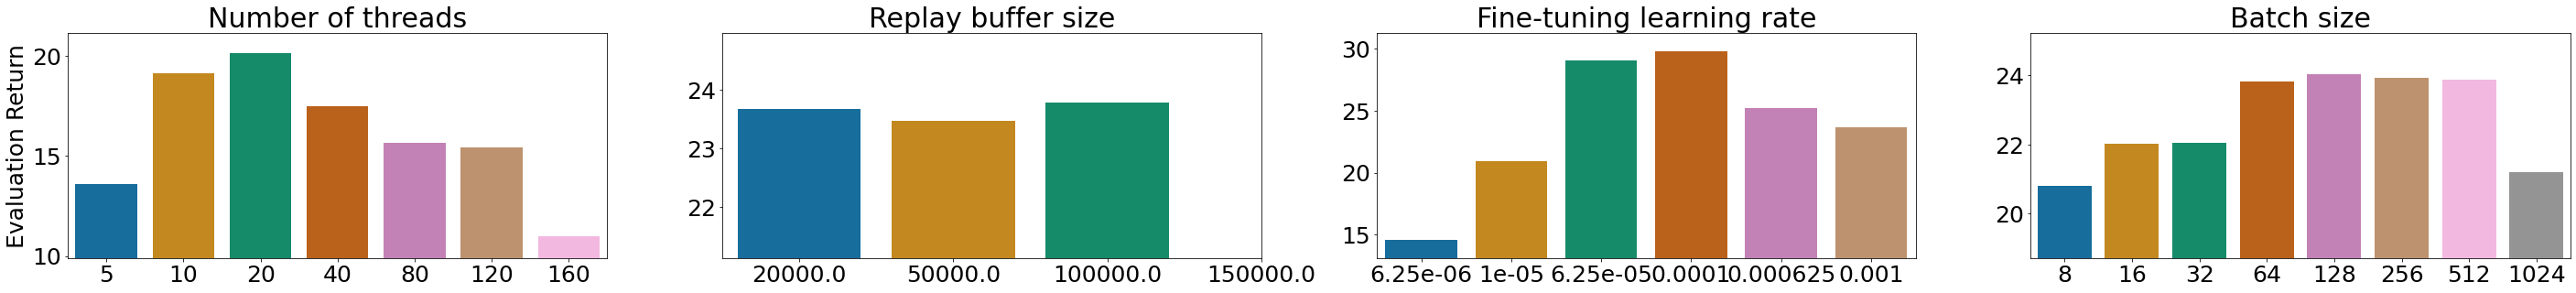

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=len(all_results_perfect.keys()), figsize=(40, 5))

for i, (ax, hp, values, values_max) in enumerate(zip(axes.flat, all_results_perfect.keys(), all_results_perfect.values(), all_results_perfect_max.values())):
    colors = sns.color_palette('colorblind', n_colors=len(values.keys()))

    sns.barplot(x=list(np.arange(len(values.keys()))), y=list(values.values()), ax=ax, palette=colors)
    x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
#     print(np.array(list(values_max.values())) - np.array(list(values.values())))
#     ax.errorbar(x=x_coords, y=y_coords, yerr=np.array(list(values_max.values())) - np.array(list(values.values())), fmt="none", c= "k")
    if i == 0:
        ax.set_ylabel('Evaluation Return', fontsize=25)
    ax.set_ylim(min(list(values.values()))*0.9, max(list(values.values()))*1.05)
    print(list(np.arange(len(values.keys()))))
    ax.set_xticks(list(np.arange(len(all_results_labels[hp]))))
    ax.set_xticklabels(all_results_labels[hp])
    ax.set_title(hp, fontsize=30)


plt.tight_layout()
plt.rcParams.update({'font.size': 25})
plt.savefig('obl_to_iql_perfect_hps.pdf', bbox_inches='tight')
